In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
# import pymc3 as pm
import seaborn as sns
import wtascripts.wta_helpers as wta_helpers

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# %config InlineBackend.figure_format = 'png'
# mpl.rcParams['figure.dpi']= 300

In [10]:
# Sklearn specific imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [4]:
# Load then clean dataset
df = wta_helpers.load_raw_df()
df = wta_helpers.clean_raw_df(df)

## Plan of Action
* Use multi-label binarizer :  fee column
* Use label binarizer : region
* Probably remove votes or countreports due to collinearity. Which one is better? I think votes is bad too due to direct tie to trail
  * A better model wouldn't have votes or count of reports - because those are not trail features

#### Make pipeline with this stuff

In [ ]:
### Preprocessing

In [ ]:
onehot_feats = ['Wildflowers/Meadows', 'Ridges/passes',
'Wildlife','Waterfalls','Old growth','Summits','Good for kids','Dogs allowed on leash',
'Fall foliage','Lakes','Rivers','Coast','Mountain views','Established campsites',]
# Not used: lat, long, fee, region, subregion, lengthtype

# cont_feats = ['votes', 'countreports', 'length', 'gain', 'hpoint']
cont_feats = ['votes', 'length', 'gain', 'hpoint']


oh_cols = df[onehot_feats]

#Standardize the non one-hot encoding variables into XS
s = StandardScaler()
XS = s.fit_transform(df[cont_feats])
#print(oh_cols)
# combine with the one hot encoding variables

In [26]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

In [78]:
# multilabelbinarizer for 'fees' column
mlb = MultiLabelBinarizer()
mlb.fit_transform(df['fee'].str.split(","))
mlb.classes_

array([' Northwest Forest Pass', ' Sno-Parks Permit', 'Discover Pass',
       'National Monument Fee', 'National Park Pass', 'None',
       'Northwest Forest Pass', 'Oregon State Parks Day-Use',
       'Refuge Entrance Pass', 'Sno-Parks Permit'], dtype=object)

In [79]:
# labelbinarizer for 'region' column
lb = LabelBinarizer()
lb.fit_transform(df['region'])
lb.classes_

array(['Central Cascades', 'Central Washington', 'Eastern Washington',
       'Issaquah Alps', 'Mount Rainier Area', 'North Cascades',
       'Olympic Peninsula', 'Puget Sound and Islands',
       'Snoqualmie Region', 'South Cascades', 'Southwest Washington'],
      dtype='<U23')

In [17]:
X = np.concatenate([XS, oh_cols], axis=1)
y = df['rating']

/home/spencer/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/spencer/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
X_train, X_test, y_train, ytest = train_test_split(X, y)

reg = LinearRegression()

reg.fit(X_train, y_train)

print("intercept:",reg.intercept_)
print("coefficients,",reg.coef_)

y_pred = reg.predict(X_test)

print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("MSE:", metrics.mean_squared_error(ytest, y_pred))
print("Score:", )

intercept: 3.1740941193168215
coefficients, [ 0.11405539  0.01074524 -0.01522607  0.06523101  0.10226271  0.05043016
 -0.14785167  0.21974663  0.01131794  0.27536269  0.17048953  0.02462534
  0.09011484  0.02370154  0.03386952  0.51817916  0.08962016  0.04152622]
RMSE: 0.711159821792721
MSE: 0.5057482921322547
Score:


In [19]:
newlist = cont_feats + onehot_feats
newlist
hold = sorted(zip(df[newlist], reg.coef_), key=lambda x: x[1], reverse=True)
print(hold)

[('Coast', 0.5181791568286677), ('Summits', 0.2753626937804521), ('Waterfalls', 0.2197466336104408), ('Good for kids', 0.17048952970339132), ('votes', 0.11405538586298623), ('Wildflowers/Meadows', 0.10226270589267096), ('Fall foliage', 0.09011484203707457), ('Mountain views', 0.08962015649169827), ('hpoint', 0.06523100964908066), ('Ridges/passes', 0.050430161139587835), ('Established campsites', 0.04152621584560247), ('Rivers', 0.03386952466628338), ('Dogs allowed on leash', 0.024625336711209856), ('Lakes', 0.023701540124225536), ('Old growth', 0.011317939930041723), ('length', 0.010745243576509442), ('gain', -0.015226066033928327), ('Wildlife', -0.14785167093520143)]


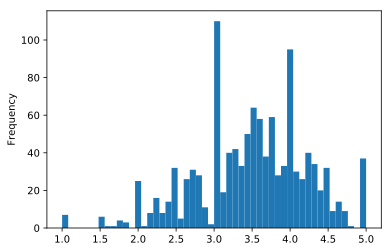

In [15]:
df.rating.plot.hist(50)

In [21]:
# votes, count of tripreports, mountains, waterfall, summits, then hpoint, then ridges/passes

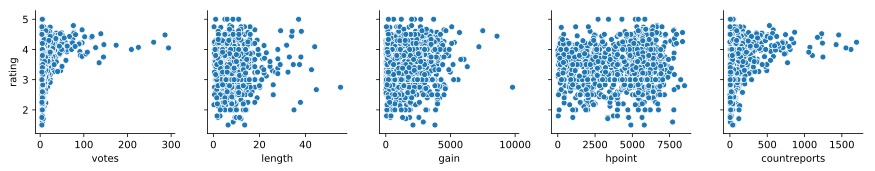

In [23]:
sns.pairplot(df[(df.votes > 3) & (df.length < 60) & (df.hpoint < 9000)],
             x_vars=['votes','length','gain','hpoint','countreports'],
             y_vars='rating')

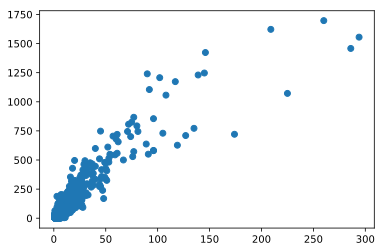

In [112]:
# votes and count reports are highly correlated
plt.scatter(df['votes'], df['countreports']);

In [114]:
cont_cols= ['votes', 'countreports', 'length', 'gain', 'hpoint', 'Wildflowers/Meadows', 'Ridges/passes',
            'Wildlife','Waterfalls','Old growth','Summits','Good for kids','Dogs allowed on leash',
            'Fall foliage','Lakes','Rivers','Coast','Mountain views','Established campsites',]

In [99]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

cont_cols = ['votes', 'countreports', 'length', 'gain', 'hpoint']
oh_cols = df[onehot_feats]

#Standardize the non one-hot encoding variables into XS
s = StandardScaler()
XS = s.fit_transform(X)
#print(oh_cols)
# combine with the one hot encoding variables

X = np.concatenate([XS, oh_cols], axis=1)
y = df['rating']

In [105]:
newlist = cont_cols + onehot_feats
newlist

['votes',
 'countreports',
 'length',
 'gain',
 'hpoint',
 'Wildflowers/Meadows',
 'Ridges/passes',
 'Wildlife',
 'Waterfalls',
 'Old growth',
 'Summits',
 'Good for kids',
 'Dogs allowed on leash',
 'Fall foliage',
 'Lakes',
 'Rivers',
 'Coast',
 'Mountain views',
 'Established campsites']

In [373]:
d = {i: len(df[i].unique()) for i in df.columns}
d

{'name': 1137,
 'region': 11,
 'subregion': 51,
 'votes': 85,
 'rating': 178,
 'length': 199,
 'lengthtype': 3,
 'gain': 321,
 'hpoint': 563,
 'fee': 12,
 'lat': 1001,
 'long': 1012,
 'trailhead1': 870,
 'countreports': 305,
 'Wildflowers/Meadows': 2,
 'Mountain views': 2,
 'Dogs allowed on leash': 2,
 'Established campsites': 2,
 'Waterfalls': 2,
 'Good for kids': 2,
 'Fall foliage': 2,
 'Ridges/passes': 2,
 'Wildlife': 2,
 'Old growth': 2,
 'Summits': 2,
 'Lakes': 2,
 'Rivers': 2,
 'Coast': 2}